# ***Machine learnig Using the SnakeHipsUK Youtube Channel***

This notebook demonstrates the use of Google API for data retrieval, date parsing with `dateutil`, and text processing with `nltk`. It includes visualizations using `seaborn` and `matplotlib`, and generates word clouds to visualize text data. Additionally, it outlines steps for cleaning the data and creating features for further analysis.

In [1]:
from googleapiclient.discovery import build
from dateutil import parser
import pandas as pd
from IPython.display import JSON

# Data viz packages
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# NLP
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
hips = pd.read_csv('/content/drive/MyDrive/snakeHipsAnal/snakeHips.csv')

## Dataset Description

The dataset contains information about various videos from the Snakehips YouTube channel. The columns in the dataset include:

- `video_id`: Unique identifier for the video.
- `channelTitle`: Title of the YouTube channel.
- `title`: Title of the video.
- `description`: Description of the video.
- `tags`: Tags associated with the video.
- `publishedAt`: Date and time when the video was published.
- `viewCount`: Number of views the video has received.
- `likeCount`: Number of likes the video has received.
- `favouriteCount`: Number of times the video has been favorited.
- `commentCount`: Number of comments on the video.
- `duration`: Duration of the video.
- `definition`: Video quality (e.g., HD, SD).
- `caption`: Whether the video has captions.
- `pushblishDayName`: Day of the week when the video was published.
- `tagCount`: Number of tags associated with the video.

## Data Cleaning and Feature Creation

1. **Data Cleaning**:
   - Handle missing values in columns such as `likeCount`, `favouriteCount`, and `commentCount`.
   - Convert `publishedAt` to a datetime format for easier manipulation.
   - Normalize text data by removing special characters and converting text to lowercase.

2. **Feature Creation**:
   - Extract additional features from the `publishedAt` column, such as the year, month, and day of the week.
   - Calculate the length of the video title and description.
   - Count the number of tags associated with each video.
   - Generate word clouds to visualize the most common words in video titles and descriptions.

By following these steps, we aim to gain insights into the characteristics of popular videos and understand the factors that contribute to their success.

In [4]:
hips

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,pushblishDayName,tagCount
0,lMeaksVlPN4,Snakehips,Snakehips & EARTHGANG (SNAKEGANG) - The Remedy...,Snakehips & EARTHGANG (SNAKEGANG) - The Remedy...,['snakehips majestic casual snake hips hip hop...,2024-07-25 19:17:16+00:00,4983.0,212.0,NaN,7.0,PT3M18S,hd,False,Thursday,13
1,JHFhuS3pGXE,Snakehips,Snakehips & EARTHGANG (SNAKEGANG) - Bounce ft....,Snakehips & EARTHGANG (SNAKEGANG) - Bounce ft....,['snakehips majestic casual snake hips hip hop...,2024-07-22 17:20:17+00:00,7341.0,339.0,NaN,9.0,PT3M42S,hd,False,Monday,13
2,Bq8tAdgP2HU,Snakehips,Snakehips & EARTHGANG (SNAKEGANG) - GLIMMER. (...,Snakehips & EARTHGANG (SNAKEGANG) - GLIMMER.\n...,['snakehips majestic casual snake hips hip hop...,2024-07-19 16:00:08+00:00,341304.0,2112.0,NaN,53.0,PT2M56S,hd,False,Friday,13
3,hPe44LLzmGM,Snakehips,Snakehips & EARTHGANG (SNAKEGANG) feat Sinéad ...,Snakehips & EARTHGANG feat Sinéad Harnett - Be...,['snakehips majestic casual snake hips hip hop...,2024-06-23 08:54:29+00:00,163764.0,3121.0,NaN,32.0,PT3M10S,hd,False,Sunday,21
4,WjCBiRCSLqw,Snakehips,Snakehips - Bringing Me Home (feat. LAUREL) (O...,Snakehips - Bringing Me Home (feat. LAUREL) \n...,['snakehips majestic casual snake hips hip hop...,2023-12-13 12:57:52+00:00,154845.0,321.0,NaN,7.0,PT3M30S,hd,False,Wednesday,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,scREqUpkLw4,Snakehips,Banks - Warm Water (SNAKEHIPS Remix),»Follow Snakehips:\nSoundcloud: https://soundc...,"['snakehips', 'majestic casual', 'forever', 's...",2014-06-18 14:46:32+00:00,15605.0,261.0,NaN,4.0,PT2M45S,sd,False,Wednesday,21
124,HfQaebOEkAU,Snakehips,The Weeknd - Wanderlust (SNAKEHIPS Remix),»Follow Snakehips:\nSoundcloud: https://soundc...,"['snakehips', 'majestic casual', 'snake', 'hip...",2014-06-18 11:33:18+00:00,838720.0,8766.0,NaN,62.0,PT3M41S,sd,False,Wednesday,21
125,IUukUEfiqyU,Snakehips,SNAKEHIPS - Miss U Always,»Follow Snakehips:\nSoundcloud: https://soundc...,"['snakehips', 'majestic casual', 'snake', 'hip...",2014-06-17 16:43:37+00:00,47582.0,593.0,NaN,11.0,PT2M36S,sd,False,Tuesday,18
126,dUxbX4VXp6Y,Snakehips,SNAKEHIPS - Make It,»Follow Snakehips:\nhttps://soundcloud.com/sna...,"['snakehips', 'majestic casual', 'snake', 'hip...",2014-06-17 11:34:41+00:00,49497.0,462.0,NaN,10.0,PT3M42S,sd,False,Tuesday,18


In [5]:
hips.dtypes

,0
video_id,object
channelTitle,object
title,object
description,object
tags,object
publishedAt,object
viewCount,float64
likeCount,float64
favouriteCount,float64
commentCount,float64


In [6]:
hips.isnull().sum()
hips.dropna()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,pushblishDayName,tagCount


In [7]:
for column in ['favouriteCount', 'definition', 'caption', 'tags']:
  print(f"Unique values for {column}:")
  print(hips[column].unique())
  print("-" * 20)

Unique values for favouriteCount:
[nan]
--------------------
Unique values for definition:
['hd' 'sd']
--------------------
Unique values for caption:
[False  True]
--------------------
Unique values for tags:
["['snakehips majestic casual snake hips hip hop block party soul Snakehips', 'Forever', 'Summer', 'Chilled', 'Soulful', 'House', 'Beats', 'Majestic', 'Noisey', 'Pitchfork', 'Fader', 'Earmilk', 'Hype machine']"
 "['snakehips majestic casual snake hips hip hop block party soul Snakehips', 'Forever', 'Summer', 'Chilled', 'Soulful', 'House', 'Beats', 'Majestic', 'Noisey', 'Pitchfork', 'Fader', 'Earmilk', 'Hype machine', 'earthgang', 'sinead harnett', 'dance', 'hip hop', 'rappers', 'rap', 'snakegang', 'block party']"
 nan
 "['snakehips majestic casual snake hips hip hop block party soul Snakehips', 'Forever', 'Summer', 'Chilled', 'Soulful', 'House', 'Beats', 'Majestic', 'Noisey', 'Pitchfork', 'Fader', 'Earmilk', 'Hype machine', 'Helix', 'Helix Records', 'Payday Records', 'Dance', 'Te

In [8]:
!pip install isodate==0.6.1

In [9]:
import isodate

## Data Processing Steps

In this section, we perform several data processing steps to prepare the dataset for analysis. These steps include converting video durations to seconds and timestamps for publication dates.

### Converting Video Duration to Seconds

We convert the video duration from ISO 8601 format to seconds. This involves parsing the duration and then converting it to total seconds:


In [10]:
hips['durationSecs'] = hips['duration'].apply(lambda x: isodate.parse_duration(x))

In [11]:
hips['duration_seconds'] = hips['durationSecs'].dt.total_seconds()

Parsing Duration: The isodate.parse_duration function is used to parse the ISO 8601 duration format into a timedelta object.
Converting to Seconds: The dt.total_seconds() method converts the timedelta object to total seconds, making it easier to analyze and compare video durations.

Converting Published Date to Timestamp
We convert the publishedAt column to a datetime format and then to a Unix timestamp:

In [12]:
hips['publishedAt'] = pd.to_datetime(hips['publishedAt'])
hips['publishedAt_timestamp'] = hips['publishedAt'].apply(lambda x: x.timestamp())

Datetime Conversion: The pd.to_datetime function converts the publishedAt column to a pandas datetime object.
Timestamp Conversion: The timestamp() method is applied to convert the datetime object to a Unix timestamp, which represents the number of seconds since January 1, 1970.
These transformations standardize the duration and publication date formats, facilitating further analysis and visualization.



### Data Cleaning: Removing Dollar Signs

In this step, we remove any dollar signs (`$`) from the data to avoid issues when creating plots. Dollar signs can interfere with numerical operations and visualizations, so it's important to clean them from the dataset:


In [13]:
hips = hips.replace('\$', '', regex=True)

Removing Dollar Signs: The replace method with a regular expression (regex=True) is used to find and remove all occurrences of the dollar sign ($) in the dataset. This ensures that the data is clean and ready for numerical analysis and plotting.


In [14]:
hips

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,pushblishDayName,tagCount,durationSecs,duration_seconds,publishedAt_timestamp
0,lMeaksVlPN4,Snakehips,Snakehips & EARTHGANG (SNAKEGANG) - The Remedy...,Snakehips & EARTHGANG (SNAKEGANG) - The Remedy...,['snakehips majestic casual snake hips hip hop...,2024-07-25 19:17:16+00:00,4983.0,212.0,NaN,7.0,PT3M18S,hd,False,Thursday,13,0 days 00:03:18,198.0,1.721935e+09
1,JHFhuS3pGXE,Snakehips,Snakehips & EARTHGANG (SNAKEGANG) - Bounce ft....,Snakehips & EARTHGANG (SNAKEGANG) - Bounce ft....,['snakehips majestic casual snake hips hip hop...,2024-07-22 17:20:17+00:00,7341.0,339.0,NaN,9.0,PT3M42S,hd,False,Monday,13,0 days 00:03:42,222.0,1.721669e+09
2,Bq8tAdgP2HU,Snakehips,Snakehips & EARTHGANG (SNAKEGANG) - GLIMMER. (...,Snakehips & EARTHGANG (SNAKEGANG) - GLIMMER.\n...,['snakehips majestic casual snake hips hip hop...,2024-07-19 16:00:08+00:00,341304.0,2112.0,NaN,53.0,PT2M56S,hd,False,Friday,13,0 days 00:02:56,176.0,1.721405e+09
3,hPe44LLzmGM,Snakehips,Snakehips & EARTHGANG (SNAKEGANG) feat Sinéad ...,Snakehips & EARTHGANG feat Sinéad Harnett - Be...,['snakehips majestic casual snake hips hip hop...,2024-06-23 08:54:29+00:00,163764.0,3121.0,NaN,32.0,PT3M10S,hd,False,Sunday,21,0 days 00:03:10,190.0,1.719133e+09
4,WjCBiRCSLqw,Snakehips,Snakehips - Bringing Me Home (feat. LAUREL) (O...,Snakehips - Bringing Me Home (feat. LAUREL) \n...,['snakehips majestic casual snake hips hip hop...,2023-12-13 12:57:52+00:00,154845.0,321.0,NaN,7.0,PT3M30S,hd,False,Wednesday,13,0 days 00:03:30,210.0,1.702472e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,scREqUpkLw4,Snakehips,Banks - Warm Water (SNAKEHIPS Remix),»Follow Snakehips:\nSoundcloud: https://soundc...,"['snakehips', 'majestic casual', 'forever', 's...",2014-06-18 14:46:32+00:00,15605.0,261.0,NaN,4.0,PT2M45S,sd,False,Wednesday,21,0 days 00:02:45,165.0,1.403103e+09
124,HfQaebOEkAU,Snakehips,The Weeknd - Wanderlust (SNAKEHIPS Remix),»Follow Snakehips:\nSoundcloud: https://soundc...,"['snakehips', 'majestic casual', 'snake', 'hip...",2014-06-18 11:33:18+00:00,838720.0,8766.0,NaN,62.0,PT3M41S,sd,False,Wednesday,21,0 days 00:03:41,221.0,1.403091e+09
125,IUukUEfiqyU,Snakehips,SNAKEHIPS - Miss U Always,»Follow Snakehips:\nSoundcloud: https://soundc...,"['snakehips', 'majestic casual', 'snake', 'hip...",2014-06-17 16:43:37+00:00,47582.0,593.0,NaN,11.0,PT2M36S,sd,False,Tuesday,18,0 days 00:02:36,156.0,1.403023e+09
126,dUxbX4VXp6Y,Snakehips,SNAKEHIPS - Make It,»Follow Snakehips:\nhttps://soundcloud.com/sna...,"['snakehips', 'majestic casual', 'snake', 'hip...",2014-06-17 11:34:41+00:00,49497.0,462.0,NaN,10.0,PT3M42S,sd,False,Tuesday,18,0 days 00:03:42,222.0,1.403005e+09


### Sorting and Visualizing Top 5 Videos by View Count

In this step, we sort the dataset by the `viewCount` column in descending order and visualize the top 5 videos with the highest view counts using a bar chart.

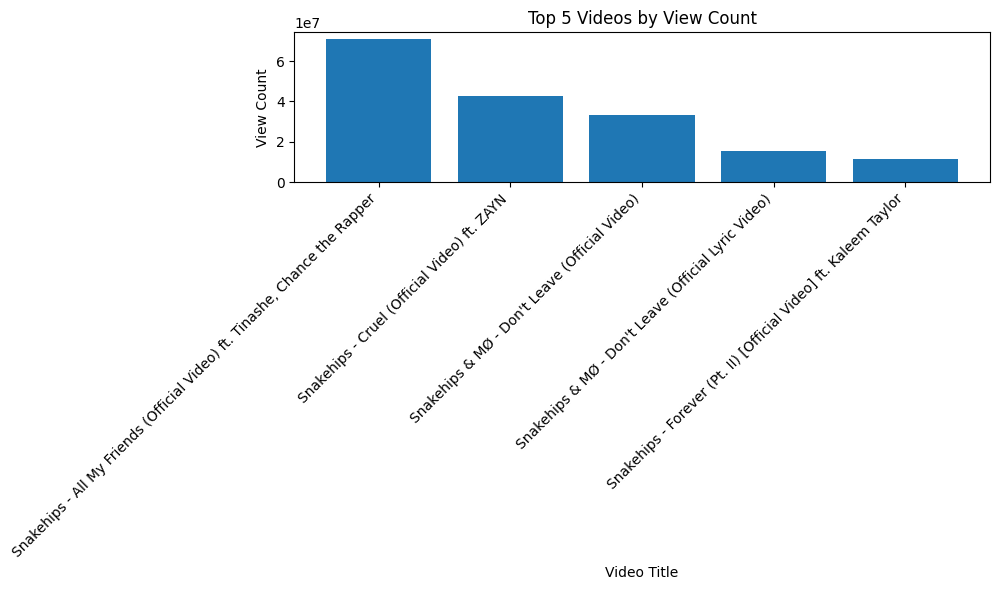

In [15]:
hips_sorted = hips.sort_values('viewCount', ascending=False)

top_5 = hips_sorted.head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_5['title'], top_5['viewCount'])
plt.xlabel('Video Title')
plt.ylabel('View Count')
plt.title('Top 5 Videos by View Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Sorting: We sort the dataset by the viewCount column in descending order using the sort_values method.
Selecting Top 5: We select the top 5 videos with the highest view counts using the head method.
Bar Chart Visualization: We create a bar chart to visualize the view counts of the top 5 videos. The plt.bar function is used to create the bar chart, and plt.xticks is used to rotate the x-axis labels for better readability. The plt.tight_layout function ensures that the layout is adjusted to fit all elements properly.
This step helps in identifying the most popular videos based on view count and provides a clear visual representation of their popularity.



### Aggregating and Visualizing Total View Count by Day of the Week

In this step, we aggregate the total view counts by the day of the week and visualize the results using a bar chart.

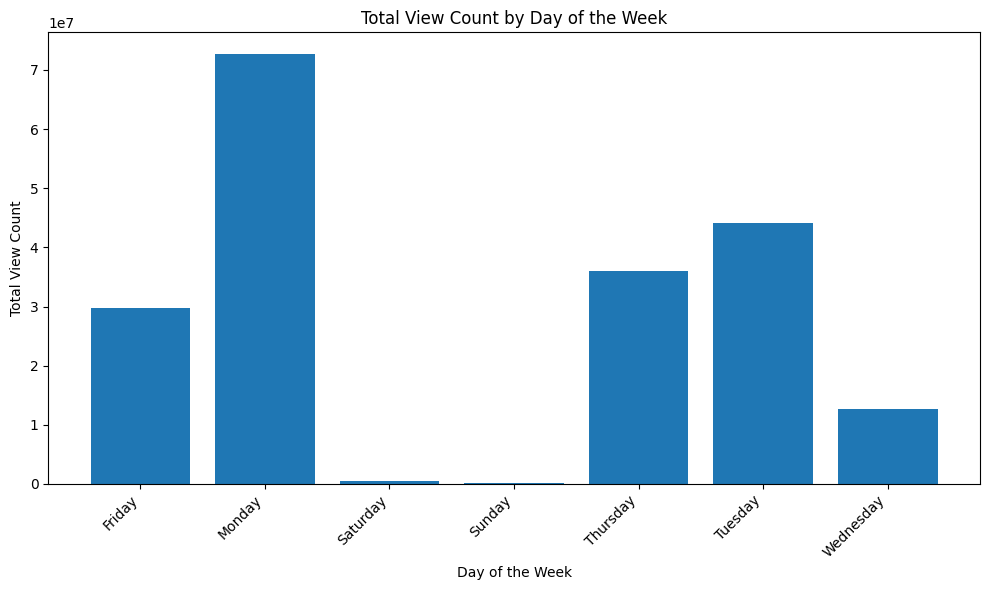

In [16]:
total_views = hips.groupby('pushblishDayName')['viewCount'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(total_views['pushblishDayName'], total_views['viewCount'])
plt.xlabel('Day of the Week')
plt.ylabel('Total View Count')
plt.title('Total View Count by Day of the Week')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Aggregation: We use the groupby method to group the dataset by the pushblishDayName column and calculate the total view counts for each day using the sum method. The reset_index method is used to convert the result back to a DataFrame.
Bar Chart Visualization: We create a bar chart to visualize the total view counts for each day of the week. The plt.bar function is used to create the bar chart, and plt.xticks is used to rotate the x-axis labels for better readability. The plt.tight_layout function ensures that the layout is adjusted to fit all elements properly.
This step helps in understanding the distribution of total view counts across different days of the week, providing insights into which days are most popular for video views.

### Time Series Analysis of Video Views

In this step, we convert the `publishedAt_timestamp` to a date format, aggregate the total view counts by date, and visualize the results using a time series plot.

In [17]:
hips['date'] = pd.to_datetime(hips['publishedAt_timestamp'], unit='s').dt.date
daily_views = hips.groupby('date')['viewCount'].sum().reset_index()

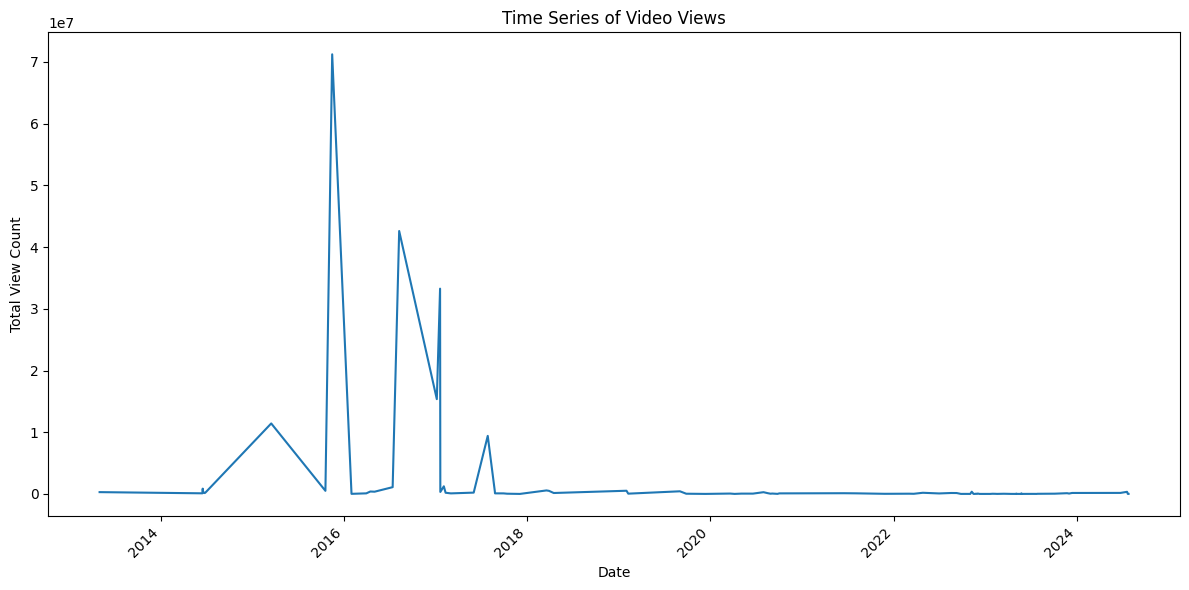

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(daily_views['date'], daily_views['viewCount'])
plt.xlabel('Date')
plt.ylabel('Total View Count')
plt.title('Time Series of Video Views')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Timestamp to Date Conversion: We convert the publishedAt_timestamp column from a timestamp to a date format using pd.to_datetime and extract the date part with .dt.date.
Aggregation: We group the dataset by the date column and calculate the total view counts for each date using the sum method. The reset_index method is used to convert the result back to a DataFrame.
Time Series Plot: We create a time series plot to visualize the total view counts over time. The plt.plot function is used to create the line plot, and plt.xticks is used to rotate the x-axis labels for better readability. The plt.tight_layout function ensures that the layout is adjusted to fit all elements properly.
This step helps in understanding the trend of video views over time, providing insights into how view counts change on a daily basis.

### Distribution of Video Durations

In this step, we visualize the distribution of video durations using a histogram. This helps in understanding the spread and frequency of different video lengths in the dataset.

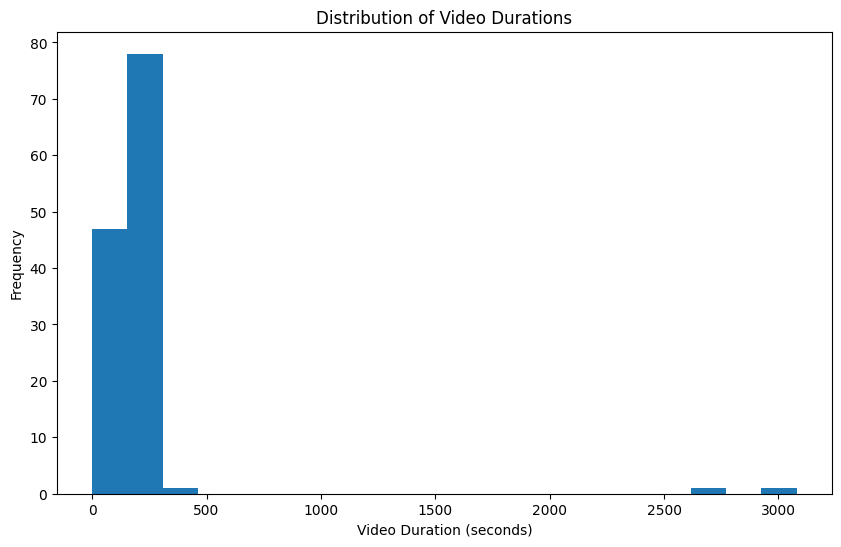

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(hips['duration_seconds'], bins=20)
plt.xlabel('Video Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Video Durations')
plt.show()

Histogram Visualization: We create a histogram to visualize the distribution of video durations. The plt.hist function is used to create the histogram, with bins=20 specifying the number of bins for the histogram.
Figure Size: The plt.figure(figsize=(10, 6)) function sets the size of the figure to 10 inches by 6 inches.
Labels and Title: We add labels for the x-axis (Video Duration (seconds)) and y-axis (Frequency), and set the title of the plot to Distribution of Video Durations.
This step helps in understanding the distribution of video lengths in the dataset, providing insights into the common durations of videos.

### Text Preprocessing and Word Cloud Visualization

In this step, we preprocess the text data from the `title`, `description`, and `tags` columns, and visualize the most frequent words using a word cloud.

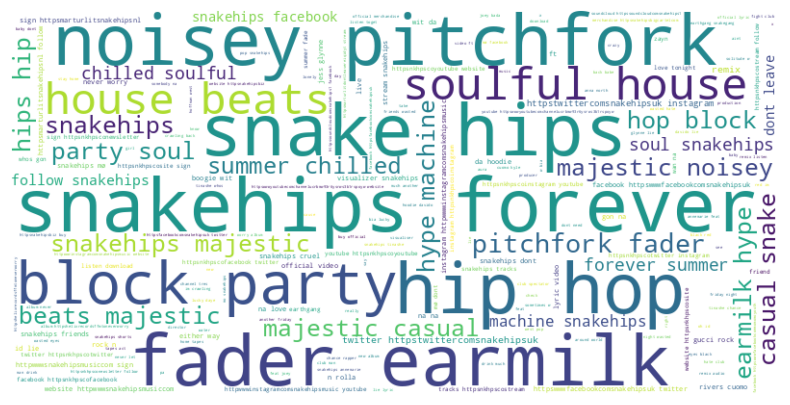

In [25]:
from wordcloud import WordCloud
import re

text = " ".join(hips['title'].astype(str).tolist() + hips['description'].astype(str).tolist() + hips['tags'].astype(str).tolist())


text = text.lower()
text = re.sub(r'[^\w\s]', '', text)
stop_words = set(stopwords.words('english'))
words = word_tokenize(text)
words = [word for word in words if not word in stop_words]
text = " ".join(words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Combine Text Data: We combine the text data from the title, description, and tags columns into a single string.
Text Preprocessing:
Convert the text to lowercase using text.lower().
Remove punctuation using re.sub(r'[^\w\s]', '', text).
Remove stopwords using the stopwords list from the nltk library and tokenize the text using word_tokenize.
Word Cloud Generation: We generate a word cloud using the WordCloud class from the wordcloud library, specifying the width, height, and background color.
Visualization: We plot the word cloud using plt.imshow and remove the axis using plt.axis("off").
This step helps in visualizing the most frequent words in the text data, providing insights into the common themes and topics.

### One-Hot Encoding Categorical Columns

In this step, we perform one-hot encoding on the `caption` and `definition` columns. One-hot encoding is a process that converts categorical variables into a format that can be provided to machine learning algorithms to improve predictions.


In [26]:
hips = pd.get_dummies(hips, columns=['caption', 'definition'])

One-Hot Encoding: The pd.get_dummies function is used to convert the caption and definition columns into binary (0 or 1) columns. This transformation allows the machine learning model to interpret these categorical variables effectively.
Result: New columns are created for each unique value in the caption and definition columns. For example, caption_False, caption_True, definition_hd, and definition_sd.


In [27]:
hips

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,...,pushblishDayName,tagCount,durationSecs,duration_seconds,publishedAt_timestamp,date,caption_False,caption_True,definition_hd,definition_sd
0,lMeaksVlPN4,Snakehips,Snakehips & EARTHGANG (SNAKEGANG) - The Remedy...,Snakehips & EARTHGANG (SNAKEGANG) - The Remedy...,['snakehips majestic casual snake hips hip hop...,2024-07-25 19:17:16+00:00,4983.0,212.0,NaN,7.0,...,Thursday,13,0 days 00:03:18,198.0,1.721935e+09,2024-07-25,True,False,True,False
1,JHFhuS3pGXE,Snakehips,Snakehips & EARTHGANG (SNAKEGANG) - Bounce ft....,Snakehips & EARTHGANG (SNAKEGANG) - Bounce ft....,['snakehips majestic casual snake hips hip hop...,2024-07-22 17:20:17+00:00,7341.0,339.0,NaN,9.0,...,Monday,13,0 days 00:03:42,222.0,1.721669e+09,2024-07-22,True,False,True,False
2,Bq8tAdgP2HU,Snakehips,Snakehips & EARTHGANG (SNAKEGANG) - GLIMMER. (...,Snakehips & EARTHGANG (SNAKEGANG) - GLIMMER.\n...,['snakehips majestic casual snake hips hip hop...,2024-07-19 16:00:08+00:00,341304.0,2112.0,NaN,53.0,...,Friday,13,0 days 00:02:56,176.0,1.721405e+09,2024-07-19,True,False,True,False
3,hPe44LLzmGM,Snakehips,Snakehips & EARTHGANG (SNAKEGANG) feat Sinéad ...,Snakehips & EARTHGANG feat Sinéad Harnett - Be...,['snakehips majestic casual snake hips hip hop...,2024-06-23 08:54:29+00:00,163764.0,3121.0,NaN,32.0,...,Sunday,21,0 days 00:03:10,190.0,1.719133e+09,2024-06-23,True,False,True,False
4,WjCBiRCSLqw,Snakehips,Snakehips - Bringing Me Home (feat. LAUREL) (O...,Snakehips - Bringing Me Home (feat. LAUREL) \n...,['snakehips majestic casual snake hips hip hop...,2023-12-13 12:57:52+00:00,154845.0,321.0,NaN,7.0,...,Wednesday,13,0 days 00:03:30,210.0,1.702472e+09,2023-12-13,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,scREqUpkLw4,Snakehips,Banks - Warm Water (SNAKEHIPS Remix),»Follow Snakehips:\nSoundcloud: https://soundc...,"['snakehips', 'majestic casual', 'forever', 's...",2014-06-18 14:46:32+00:00,15605.0,261.0,NaN,4.0,...,Wednesday,21,0 days 00:02:45,165.0,1.403103e+09,2014-06-18,True,False,False,True
124,HfQaebOEkAU,Snakehips,The Weeknd - Wanderlust (SNAKEHIPS Remix),»Follow Snakehips:\nSoundcloud: https://soundc...,"['snakehips', 'majestic casual', 'snake', 'hip...",2014-06-18 11:33:18+00:00,838720.0,8766.0,NaN,62.0,...,Wednesday,21,0 days 00:03:41,221.0,1.403091e+09,2014-06-18,True,False,False,True
125,IUukUEfiqyU,Snakehips,SNAKEHIPS - Miss U Always,»Follow Snakehips:\nSoundcloud: https://soundc...,"['snakehips', 'majestic casual', 'snake', 'hip...",2014-06-17 16:43:37+00:00,47582.0,593.0,NaN,11.0,...,Tuesday,18,0 days 00:02:36,156.0,1.403023e+09,2014-06-17,True,False,False,True
126,dUxbX4VXp6Y,Snakehips,SNAKEHIPS - Make It,»Follow Snakehips:\nhttps://soundcloud.com/sna...,"['snakehips', 'majestic casual', 'snake', 'hip...",2014-06-17 11:34:41+00:00,49497.0,462.0,NaN,10.0,...,Tuesday,18,0 days 00:03:42,222.0,1.403005e+09,2014-06-17,True,False,False,True


### Selecting Relevant Columns

In this step, we select the most relevant columns for our machine learning tasks. This helps in focusing on the features that are most likely to impact the model's performance.

In [28]:
columns_to_keep = [
    'title', 'publishedAt_timestamp', 'viewCount', 'likeCount',
    'commentCount', 'tagCount', 'duration_seconds',
    'caption_False', 'caption_True', 'definition_hd', 'definition_sd', 'pushblishDayName'
]

# Keep only the relevant columns
hips = hips[columns_to_keep]

In [29]:
hips

,title,publishedAt_timestamp,viewCount,likeCount,commentCount,tagCount,duration_seconds,caption_False,caption_True,definition_hd,definition_sd,pushblishDayName
0,Snakehips & EARTHGANG (SNAKEGANG) - The Remedy...,1.721935e+09,4983.0,212.0,7.0,13,198.0,True,False,True,False,Thursday
1,Snakehips & EARTHGANG (SNAKEGANG) - Bounce ft....,1.721669e+09,7341.0,339.0,9.0,13,222.0,True,False,True,False,Monday
2,Snakehips & EARTHGANG (SNAKEGANG) - GLIMMER. (...,1.721405e+09,341304.0,2112.0,53.0,13,176.0,True,False,True,False,Friday
3,Snakehips & EARTHGANG (SNAKEGANG) feat Sinéad ...,1.719133e+09,163764.0,3121.0,32.0,21,190.0,True,False,True,False,Sunday
4,Snakehips - Bringing Me Home (feat. LAUREL) (O...,1.702472e+09,154845.0,321.0,7.0,13,210.0,True,False,True,False,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
123,Banks - Warm Water (SNAKEHIPS Remix),1.403103e+09,15605.0,261.0,4.0,21,165.0,True,False,False,True,Wednesday
124,The Weeknd - Wanderlust (SNAKEHIPS Remix),1.403091e+09,838720.0,8766.0,62.0,21,221.0,True,False,False,True,Wednesday
125,SNAKEHIPS - Miss U Always,1.403023e+09,47582.0,593.0,11.0,18,156.0,True,False,False,True,Tuesday
126,SNAKEHIPS - Make It,1.403005e+09,49497.0,462.0,10.0,18,222.0,True,False,False,True,Tuesday


Relevant Columns: We keep columns that provide useful information for analysis and modeling, such as viewCount, likeCount, commentCount, and duration_seconds.
Boolean Columns: We include boolean columns like caption_False, caption_True, definition_hd, and definition_sd to capture categorical information in a binary format.
Timestamp: The publishedAt_timestamp column is kept for any time-based analysis.
This step ensures that our dataset is streamlined and contains only the most pertinent features for our machine learning tasks.



### Normalizing/Standardizing Numerical Columns

In this step, we normalize or standardize the numerical columns to ensure that they contribute equally to the model. This helps in improving the performance and stability of machine learning models.

In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Columns to normalize/standardize
columns_to_scale = ['viewCount', 'likeCount', 'commentCount', 'tagCount', 'duration_seconds']

# Initialize the scaler (choose one: StandardScaler or MinMaxScaler)
scaler = StandardScaler()  # For standardization
# scaler = MinMaxScaler()  # For normalization

# Fit and transform the data
hips[columns_to_scale] = scaler.fit_transform(hips[columns_to_scale])

<ipython-input-30-a0b068d507b3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hips[columns_to_scale] = scaler.fit_transform(hips[columns_to_scale])


Columns to Scale: We select the columns viewCount, likeCount, commentCount, tagCount, and duration_seconds for scaling.
Choose Scaler: We can choose between StandardScaler for standardization (mean = 0, standard deviation = 1) or MinMaxScaler for normalization (scales data to a range of [0, 1]).
Fit and Transform: The selected columns are scaled using the chosen scaler.
This step ensures that the numerical features are scaled appropriately, which is crucial for many machine learning algorithms.

In [31]:
hips

,title,publishedAt_timestamp,viewCount,likeCount,commentCount,tagCount,duration_seconds,caption_False,caption_True,definition_hd,definition_sd,pushblishDayName
0,Snakehips & EARTHGANG (SNAKEGANG) - The Remedy...,1.721935e+09,-0.191827,-0.204335,-0.177620,-0.166104,0.026850,True,False,True,False,Thursday
1,Snakehips & EARTHGANG (SNAKEGANG) - Bounce ft....,1.721669e+09,-0.191531,-0.202796,-0.176721,-0.166104,0.095302,True,False,True,False,Monday
2,Snakehips & EARTHGANG (SNAKEGANG) - GLIMMER. (...,1.721405e+09,-0.149533,-0.181301,-0.156944,-0.166104,-0.035897,True,False,True,False,Friday
3,Snakehips & EARTHGANG (SNAKEGANG) feat Sinéad ...,1.719133e+09,-0.171860,-0.169069,-0.166383,1.112771,0.004033,True,False,True,False,Sunday
4,Snakehips - Bringing Me Home (feat. LAUREL) (O...,1.702472e+09,-0.172981,-0.203014,-0.177620,-0.166104,0.061076,True,False,True,False,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
123,Banks - Warm Water (SNAKEHIPS Remix),1.403103e+09,-0.190492,-0.203741,-0.178969,1.112771,-0.067271,True,False,False,True,Wednesday
124,The Weeknd - Wanderlust (SNAKEHIPS Remix),1.403091e+09,-0.086980,-0.100632,-0.152898,1.112771,0.092450,True,False,False,True,Wednesday
125,SNAKEHIPS - Miss U Always,1.403023e+09,-0.186470,-0.199716,-0.175822,0.633193,-0.092940,True,False,False,True,Tuesday
126,SNAKEHIPS - Make It,1.403005e+09,-0.186230,-0.201305,-0.176272,0.633193,0.095302,True,False,False,True,Tuesday


### Correlation Matrix and Heatmap Visualization

In this step, we calculate the correlation matrix for the numerical columns in our dataset and visualize it using a heatmap. This helps in understanding the relationships between different numerical features.

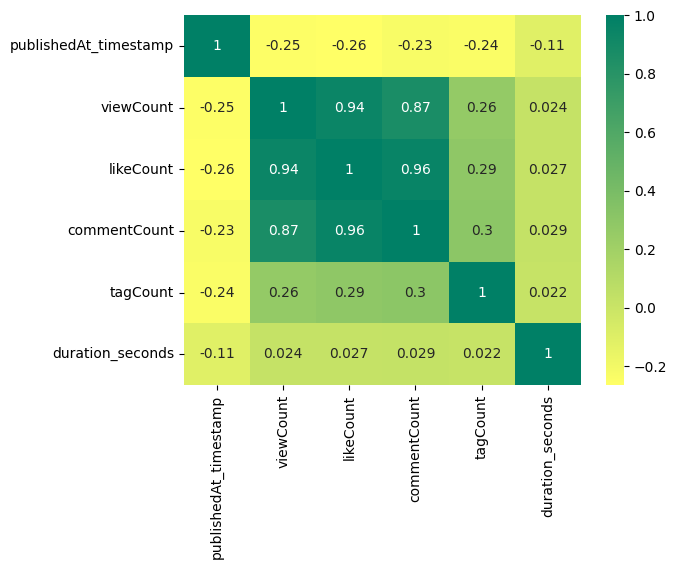

In [32]:
corr = hips.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).corr()

sns.heatmap(corr, annot=True, cmap='summer_r')
plt.show()

Correlation Matrix: We use the select_dtypes method to select numerical columns and then calculate their correlation matrix using the corr method. The correlation matrix shows the pairwise correlation coefficients between numerical features.
Heatmap Visualization: We use the seaborn library to create a heatmap of the correlation matrix. The annot=True parameter adds the correlation coefficients to the heatmap, and cmap='summer_r' sets the color map to 'summer_r' for better visualization.
This step helps in identifying the strength and direction of relationships between numerical features, which can be useful for feature selection and understanding data dependencies.